In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [65]:
# Load the data
df = pd.read_csv('bank.csv', sep=';')

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
# Check for missing value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
# Check for duplicates
df.drop_duplicates(inplace=True)

In [13]:
# Convert categorical variables
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['y'], axis=1))
y = df['y'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print (df.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [18]:
# create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

In [19]:
# train the model on the training set
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [20]:
# make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

In [21]:
# evaluate the model using accuracy score and confusion matrix
acc_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [22]:
print("Logistic Regression Accuracy:", acc_lr)

Logistic Regression Accuracy: 0.901657458563536


In [23]:
print("Logistic Regression Confusion Matrix:\n", cm_lr)

Logistic Regression Confusion Matrix:
 [[789  18]
 [ 71  27]]


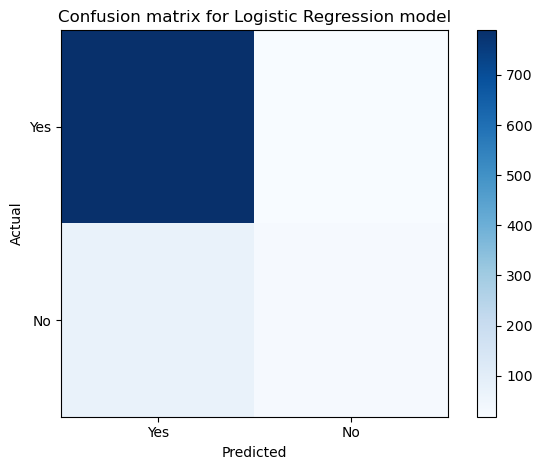

In [24]:
plt.imshow(cm_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Logistic Regression model')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Yes', 'No'])
plt.yticks(tick_marks, ['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

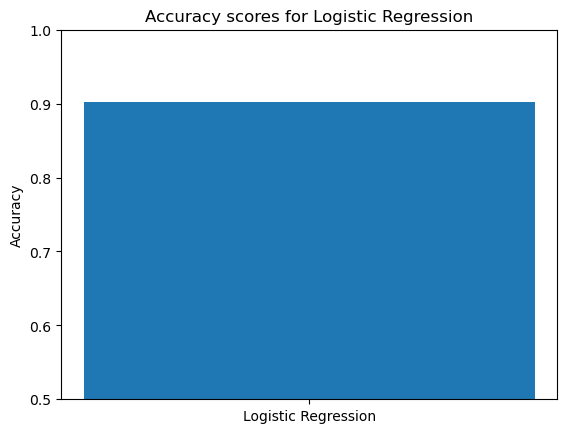

In [25]:
plt.bar(['Logistic Regression'], [acc_lr])
plt.ylim(0.5, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy scores for Logistic Regression')

plt.show()

In [60]:
report = classification_report(y_test, y_pred_lr)

print(report)

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [28]:
# train the model on the training set
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [30]:
# evaluate the model using accuracy score and confusion matrix
acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [31]:
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 0.8917127071823204


In [32]:
print("Decision Tree Confusion Matrix:\n", cm_dt)

Decision Tree Confusion Matrix:
 [[754  53]
 [ 45  53]]


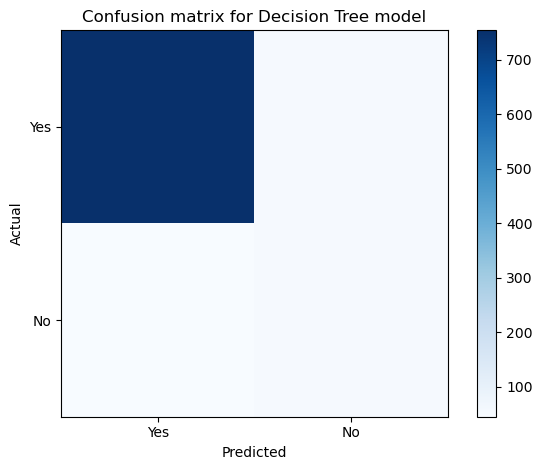

In [33]:
plt.imshow(cm_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Decision Tree model')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Yes', 'No'])
plt.yticks(tick_marks, ['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

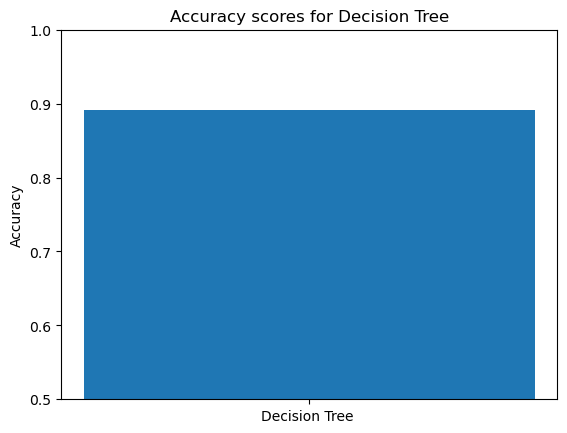

In [34]:
plt.bar(['Decision Tree '], [acc_dt])
plt.ylim(0.5, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy scores for Decision Tree')

plt.show()

In [61]:
report = classification_report(y_test, y_pred_dt)

print(report)

              precision    recall  f1-score   support

          no       0.94      0.93      0.94       807
         yes       0.50      0.54      0.52        98

    accuracy                           0.89       905
   macro avg       0.72      0.74      0.73       905
weighted avg       0.90      0.89      0.89       905



In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [37]:
# train the model on the training set
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [39]:
# evaluate the model using accuracy score and confusion matrix
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [40]:
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.901657458563536


In [41]:
print("Random Forest Confusion Matrix:\n", cm_rf)

Random Forest Confusion Matrix:
 [[790  17]
 [ 72  26]]


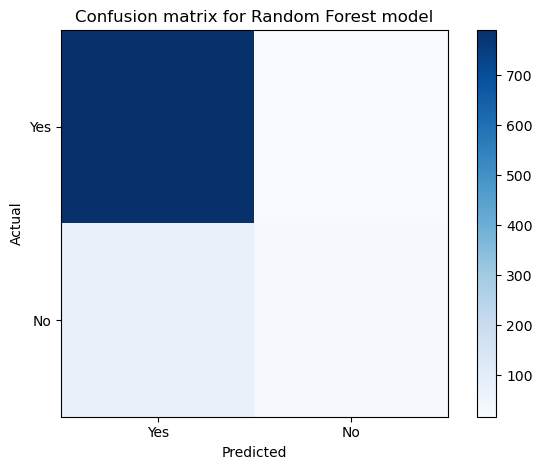

In [42]:
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Random Forest model')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Yes', 'No'])
plt.yticks(tick_marks, ['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

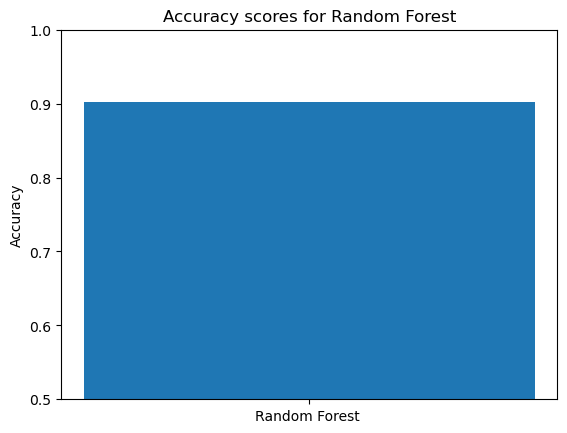

In [43]:
plt.bar(['Random Forest '], [acc_rf])
plt.ylim(0.5, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy scores for Random Forest')

plt.show()

In [62]:
report = classification_report(y_test, y_pred_rf)

print(report)

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.60      0.27      0.37        98

    accuracy                           0.90       905
   macro avg       0.76      0.62      0.66       905
weighted avg       0.88      0.90      0.88       905



In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
# create a Naive Bayes model
nb_model = GaussianNB()

In [46]:
# train the model on the training set
nb_model.fit(X_train, y_train)

GaussianNB()

In [47]:
# make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

In [48]:
# evaluate the model using accuracy score and confusion matrix
acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [49]:
print("Naive Bayes Accuracy:", acc_nb)

Naive Bayes Accuracy: 0.8243093922651934


In [50]:
print("Naive Bayes Confusion Matrix:\n", cm_nb)

Naive Bayes Confusion Matrix:
 [[708  99]
 [ 60  38]]


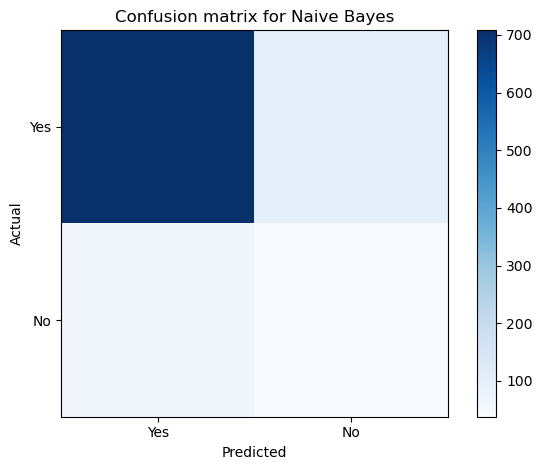

In [51]:
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for Naive Bayes')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Yes', 'No'])
plt.yticks(tick_marks, ['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

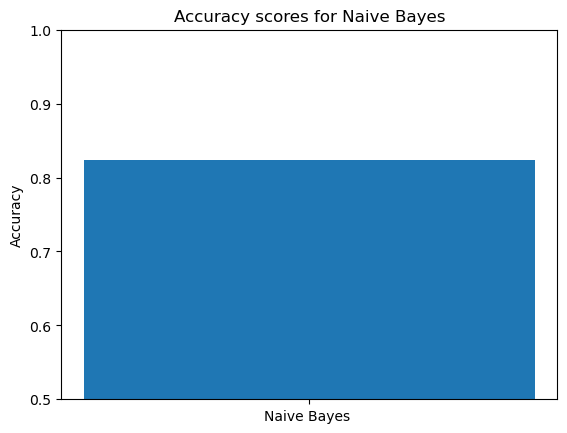

In [52]:
plt.bar(['Naive Bayes '], [acc_nb])
plt.ylim(0.5, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy scores for Naive Bayes')

plt.show()

In [63]:
report = classification_report(y_test, y_pred_nb)

print(report)

              precision    recall  f1-score   support

          no       0.92      0.88      0.90       807
         yes       0.28      0.39      0.32        98

    accuracy                           0.82       905
   macro avg       0.60      0.63      0.61       905
weighted avg       0.85      0.82      0.84       905



In [53]:

from sklearn.neighbors import KNeighborsClassifier
# create a Naive Bayes model
knn_model = KNeighborsClassifier(n_neighbors=5)
# train the model on the training set
knn_model.fit(X_train, y_train)
# make predictions on the test set
y_pred_knn = knn_model.predict(X_test)
# evaluate the model using accuracy score and confusion matrix
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
print("KNN Accuracy:", acc_knn)
print("KNN Confusion Matrix:\n", cm_knn)

KNN Accuracy: 0.8861878453038674
KNN Confusion Matrix:
 [[785  22]
 [ 81  17]]


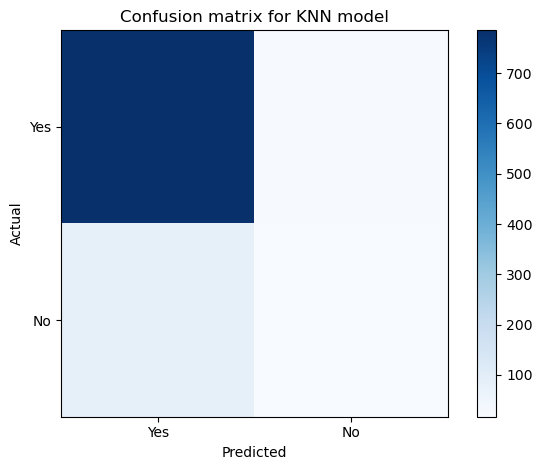

In [55]:
plt.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix for KNN model')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Yes', 'No'])
plt.yticks(tick_marks, ['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


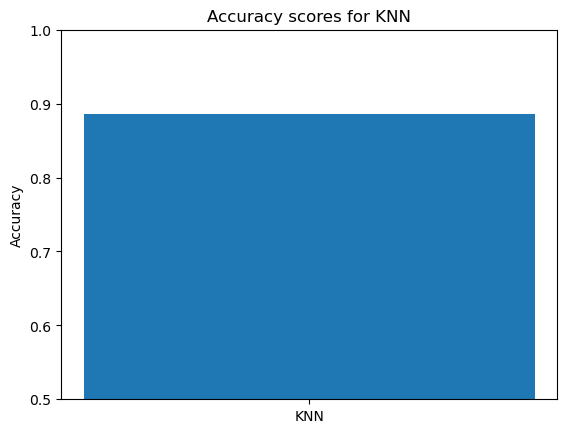

In [56]:
plt.bar(['KNN'], [acc_knn])
plt.ylim(0.5, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy scores for KNN')
plt.show()

In [57]:
report = classification_report(y_test, y_pred_knn)

In [58]:
print(report)

              precision    recall  f1-score   support

          no       0.91      0.97      0.94       807
         yes       0.44      0.17      0.25        98

    accuracy                           0.89       905
   macro avg       0.67      0.57      0.59       905
weighted avg       0.86      0.89      0.86       905



In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
print("KNN Accuracy:", acc_knn)

KNN Accuracy: 0.8861878453038674


In [109]:
print("KNN Confusion Matrix:\n", cm_knn)

KNN Confusion Matrix:
 [[785  22]
 [ 81  17]]


[0.07553866 0.06532729 0.04986406 0.04710212 0.04062852 0.03878255
 0.03444239 0.03028008 0.02898867 0.02620377]


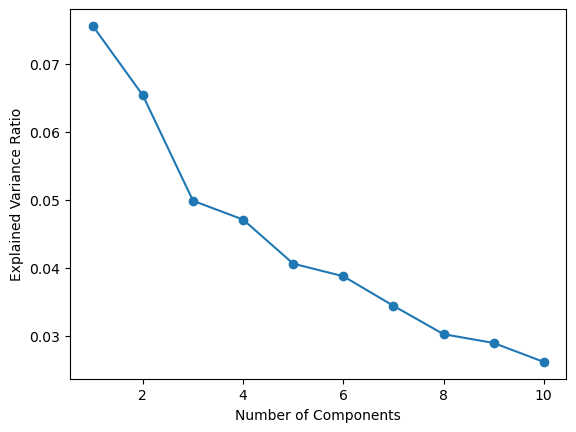

In [110]:
# Import libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('bank.csv')


# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA with 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratio for each component
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio
import matplotlib.pyplot as plt
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()